# **COSMOBASE: Escuela de Verano en Cosmología**
📅 23–27 de junio de 2025

📍 Facultad de Física, Universidad Veracruzana — Xalapa, Veracruz, México
--------------------------------------------------------------------------
## **deslike**:
Este tutorial está basado en el material desarrollado por Arnaud de Mattia y fue adaptado para la escuela COSMOBASE por:

Hernán E. Noriega & Gustavo Niz

## ❗ **Documentación adicional:**

[desilike docs](https://desilike.readthedocs.io/), especialmente [getting started](https://desilike.readthedocs.io/en/latest/user/getting_started.html)

[desilike notebooks](https://github.com/cosmodesi/desilike/tree/main/nb)

## **Objetivos**
Al final del tutorial sabrás:

* cómo escribir verosimilitudes o *likelihoods* de clustering

* cómo emular su teoría

* cómo realizar inferencia (muestreo, perfilado)

## **Instalación de librerías**

In [ ]:
!pip install numpy==1.26.4                                             #librería para cómputo científico
!pip install git+https://github.com/cosmodesi/desilike#egg=desilike    #código desilike

!python -m pip install jax[cpu]                                        #biblioteca JAX (desarrollada por Google)
import warnings
warnings.filterwarnings('ignore')
import jax; jax.config.update('jax_platform_name', 'cpu')

!python -m pip install git+https://github.com/adematti/pyclass         #CLASS

  Cloning https://github.com/cosmodesi/desilike to /tmp/pip-install-59z1fa4g/desilike_82f5390bda644968b3d9060e3ebaf00b
  Running command git clone --filter=blob:none --quiet https://github.com/cosmodesi/desilike /tmp/pip-install-59z1fa4g/desilike_82f5390bda644968b3d9060e3ebaf00b
  Resolved https://github.com/cosmodesi/desilike to commit b7bc391b97fd78e1aacf733c1089c7ed6603d16c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/cosmodesi/cosmoprimo to /tmp/pip-install-59z1fa4g/cosmoprimo_ba600490283649f2861e3d7ad3e54491
  Running command git clone --filter=blob:none --quiet https://github.com/cosmodesi/cosmoprimo /tmp/pip-install-59z1fa4g/cosmoprimo_ba600490283649f2861e3d7ad3e54491
  Resolved https://github.com/cosmodesi/cosmoprimo to commit f35dec664b50dea83033204a8cdb6ec586be30b9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Prepa

## **Verosimilitud de clustering**

Vamos a describir cómo especificar la verosimilitud para los multipolos del espectro de potencias o de la función de correlación:

* template
* theory
* observable

## **Template**

Cómo se parametriza el espectro de potencias lineal que sirve como entrada a los códigos teóricos. Existen varias opciones, entre ellas:

### **Parametrización estándar (como en BOSS/eBOSS)**

En términos de:

- parámetros de escala $q_{\parallel}, q_{\perp}$
- variación en la tasa de crecimiento de estructuras $ df = f / f^{\mathrm{fid}}$

In [ ]:
from desilike.theories.galaxy_clustering import\
StandardPowerSpectrumTemplate

In [ ]:
#help(StandardPowerSpectrumTemplate)         #ver información de la clase

In [ ]:
template = StandardPowerSpectrumTemplate(z=1.1)      ##<---- especificamos el redshift o corrimiento al rojo
# This shows all parameters, after initialization
print(template.all_params)

ParameterCollection(['qpar', 'qper', 'df'])


In [ ]:
#Puedes acceder a la cosmología usando
template.cosmo.get_params()

{'k_pivot': 0.05,
 'beta_s': 0.0,
 'r': 0.0,
 'n_t': -0.0,
 'alpha_t': -0.0,
 'T_cmb': array(2.7255),
 'T_ncdm_over_cmb': array([0.71611]),
 'reionization_width': 0.5,
 'A_L': 1.0,
 'cs2_fld': array(1.),
 'non_linear': '',
 'modes': ['s'],
 'lensing': False,
 'z_pk': array([ 0.        ,  0.01189061,  0.04756243,  0.10701546,  0.1902497 ,
         0.29726516,  0.42806183,  0.58263971,  0.76099881,  0.96313912,
         1.18906064,  1.43876338,  1.71224732,  2.00951249,  2.33055886,
         2.67538644,  3.04399524,  3.43638526,  3.85255648,  4.29250892,
         4.75624257,  5.24375743,  5.75505351,  6.2901308 ,  6.8489893 ,
         7.43162901,  8.03804994,  8.66825208,  9.32223543, 10.        ]),
 'kmax_pk': 10.0,
 'ellmax_cl': 2500,
 'YHe': 'BBN',
 'use_ppf': True,
 'tau_reio': 0.0544,
 'h': array(0.6736),
 'A_s': array(2.083e-09),
 'n_s': 0.9649,
 'alpha_s': 0.0,
 'w0_fld': array(-1.),
 'wa_fld': array(0.),
 'Omega_k': 0.0,
 'Omega_b': array(0.04930169),
 'Omega_cdm': array(0.264470

In [ ]:
#más cosas que incluye "template"
dir(template)

['DH_fid',
 'DH_over_DM_fid',
 'DH_over_rd_fid',
 'DM_fid',
 'DM_over_rd_fid',
 'DV_fid',
 'DV_over_rd_fid',
 '__call__',
 '__class__',
 '__clear__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_interpolator_k',
 '_mpicomm',
 '_set_base',
 'all_params',
 'ap_k_mu',
 'apeffect',
 'calculate',
 'config_fn',
 'copy',
 'cosmo',
 'cosmo_requires',
 'deepcopy',
 'eta',
 'f0_fid',
 'f_fid',
 'fiducial',
 'fk_fid',
 'from_state',
 'fsigma8_fid',
 'fsigmar_fid',
 'get',
 'info',
 'init',
 'initialize',
 'k',
 'load',
 'log_critical',
 'log_debug',
 'log_error',
 'log_info',
 'log_warning',
 'logger',
 'mpico

Si se desea expresar $q_{\parallel}, q_{\perp}$ en términos del escalamiento isotrópico $ q_{\mathrm{iso}} $ y del parámetro de Alcock-Paczyński $ q_{\mathrm{ap}}$, se puede usar la siguiente relación:

- $ q_{\rm iso} = (q_{\parallel}  q_{\perp}^2)^{1/3} $
- $ q_{\rm ap} = q_{\parallel} / q_{\perp} $

(Ya viene incorporado dentro de desilike en el flag `apmode`)


In [ ]:
#para usar "q_ap" y "q_iso" activamos la flag 'apmode"
template = StandardPowerSpectrumTemplate(z=1.1, apmode='qisoqap')
print(template.all_params)

ParameterCollection(['qiso', 'qap', 'df'])


### **[ShapeFit](https://arxiv.org/abs/2106.07641) parameterización**

en términos de:
- parámetros de escala $q_{\parallel}$, $q_{\perp}$
- variación en la tasa de crecimiento de estructuras $df = f / f^{\mathrm{fid}}$
- parámetro de inclinación de ShapeFit $dm$


In [ ]:
from desilike.theories.galaxy_clustering import\
ShapeFitPowerSpectrumTemplate ##ShapeFit <----

template = ShapeFitPowerSpectrumTemplate(z=1.1) ###<---- corrimiento al rojo
# This shows all parameters, after initialization
print(template.all_params)

ParameterCollection(['qpar', 'qper', 'dm', 'dn', 'df', 'f_sqrt_Ap', 'm', 'n'])


¡Tenemos parámetros adicionales que codifican información extra del espectro de potencia!

In [ ]:
#librerias para graficar
import numpy as np
from matplotlib import colors, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import pyplot as plt

#teorias!
from desilike.theories.galaxy_clustering import  KaiserTracerPowerSpectrumMultipoles, ShapeFitPowerSpectrumTemplate, WiggleSplitPowerSpectrumTemplate, BandVelocityPowerSpectrumTemplate

#especificamos corrimiento al rojo y bias.
z, b1 = 1.1, 2.

def get_theory(template):
    template.init.update({'z': z, 'fiducial': 'DESI'})
    theory = KaiserTracerPowerSpectrumMultipoles(template=template) #usamos Kaiser para calcular los multipolos
    theory.params['b1'].update(fixed=False, value=b1)               #update a parametros nuisances
    theory.params['sn0'].update(fixed=False, value=0.)
    return theory

n = 5
cmap = plt.get_cmap('jet', n)

##definimos una función para la grafica
#def plot(template, template_name, params):
#    theory_compression = get_theory(template=template)
#    theory_compression()
#    center_params = {param.name: param.value for param in theory_compression.varied_params}
#    print(center_params)
#    fig, lax = plt.subplots(1, len(params), sharex=False, sharey=True, figsize=(4 * len(params), 4))
#    lax = lax.flatten()
#    fig.subplots_adjust(wspace=0.25)

#    for iax, (param, values) in enumerate(params.items()):
#        theory_compression(**center_params)
#        ax = lax[iax]
#        for ivalue, value in enumerate(values):
#            poles = theory_compression(**{param: value})
#            for ill, ell in enumerate(theory_compression.ells):
#                ax.plot(theory_compression.k, theory_compression.k * poles[ill], color=cmap(ivalue))
#                #ax.loglog(theory_compression.k,  poles[0], color=cmap(ivalue))
#        ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
#        ax.set_ylabel(r'$k P_{\ell}(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
#        ax.grid(True)
#        norm = colors.Normalize(vmin=values[0], vmax=values[-1])
#        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
#        divider = make_axes_locatable(ax)
#        cax = divider.new_vertical(size='5%', pad = 0.5)
#        fig.add_axes(cax)
#        cbar = plt.colorbar(sm, cax=cax, ax=ax, orientation='horizontal')
#        cbar.set_label(theory_compression.all_params[param].latex(inline=True), rotation=0)
#    plt.show()

In [ ]:
##definimos una función para la grafica
def plot(template, template_name, params):
    #evalua la teoria en los valores centrales
    theory_compression = get_theory(template=template)
    theory_compression()
    center_params = {param.name: param.value for param in theory_compression.varied_params}
    print(center_params)

    n_params = len(params)
    fig, axes = plt.subplots(2, n_params, figsize=(4 * n_params, 8), sharex=False, sharey=False)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    if n_params == 1:
        axes = np.array([[axes[0]], [axes[1]]])  # ensure 2D shape

    # Para la barra de color global
    all_values = list(params.values())[0]  # asumimos que todos tienen mismo rango
    norm = colors.Normalize(vmin=all_values[0], vmax=all_values[-1])
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    for iax, (param, values) in enumerate(params.items()):
        theory_compression(**center_params)
        ax_loglog = axes[0, iax]  # fila superior
        ax_linear = axes[1, iax]  # fila inferior

        for ivalue, value in enumerate(values):
            poles = theory_compression(**{param: value})
            color = cmap(ivalue)

            #                               Evaluación del modelo                                   #
            #########################################################################################
            # loglog arriba (P_0)
            ax_loglog.loglog(theory_compression.k, poles[0], color=color)

            # lineal abajo (k·P_ell)
            for ill, ell in enumerate(theory_compression.ells):
                ax_linear.plot(theory_compression.k, theory_compression.k * poles[ill], color=color)
            #########################################################################################

        ax_loglog.set_title(f'{theory_compression.all_params[param].latex(inline=True)} — log-log')
        ax_loglog.set_ylabel(r'$P_0(k)$ [$(\mathrm{Mpc}/h)^3$]')
        ax_loglog.grid(True, which='both', linestyle=':')

        ax_linear.set_title(f'{theory_compression.all_params[param].latex(inline=True)} — linear')
        ax_linear.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
        ax_linear.set_ylabel(r'$k P_\ell(k)$ [$(\mathrm{Mpc}/h)^2$]')
        ax_linear.grid(True, which='both', linestyle=':')

    # Barra de color encima de la columna iax
        norm = colors.Normalize(vmin=values[0], vmax=values[-1])
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        # Definir la posición: [left, bottom, width, height] en coordenadas de figura
        width = 1.0 / n_params
        left = iax * width + 0.05 * width
        cax = fig.add_axes([left, 0.98, 0.9 * width, 0.015])  # encima de los subplots

        cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
        cbar.set_label(theory_compression.all_params[param].latex(inline=True), rotation=0)

    plt.tight_layout(rect=[0, 0, 1, 0.94])  # deja espacio para la barra de color arriba
    plt.show()

{'qpar': 1.0, 'qper': 1.0, 'dm': 0.0, 'df': 1.0, 'b1': 2.0, 'sn0': 0.0}


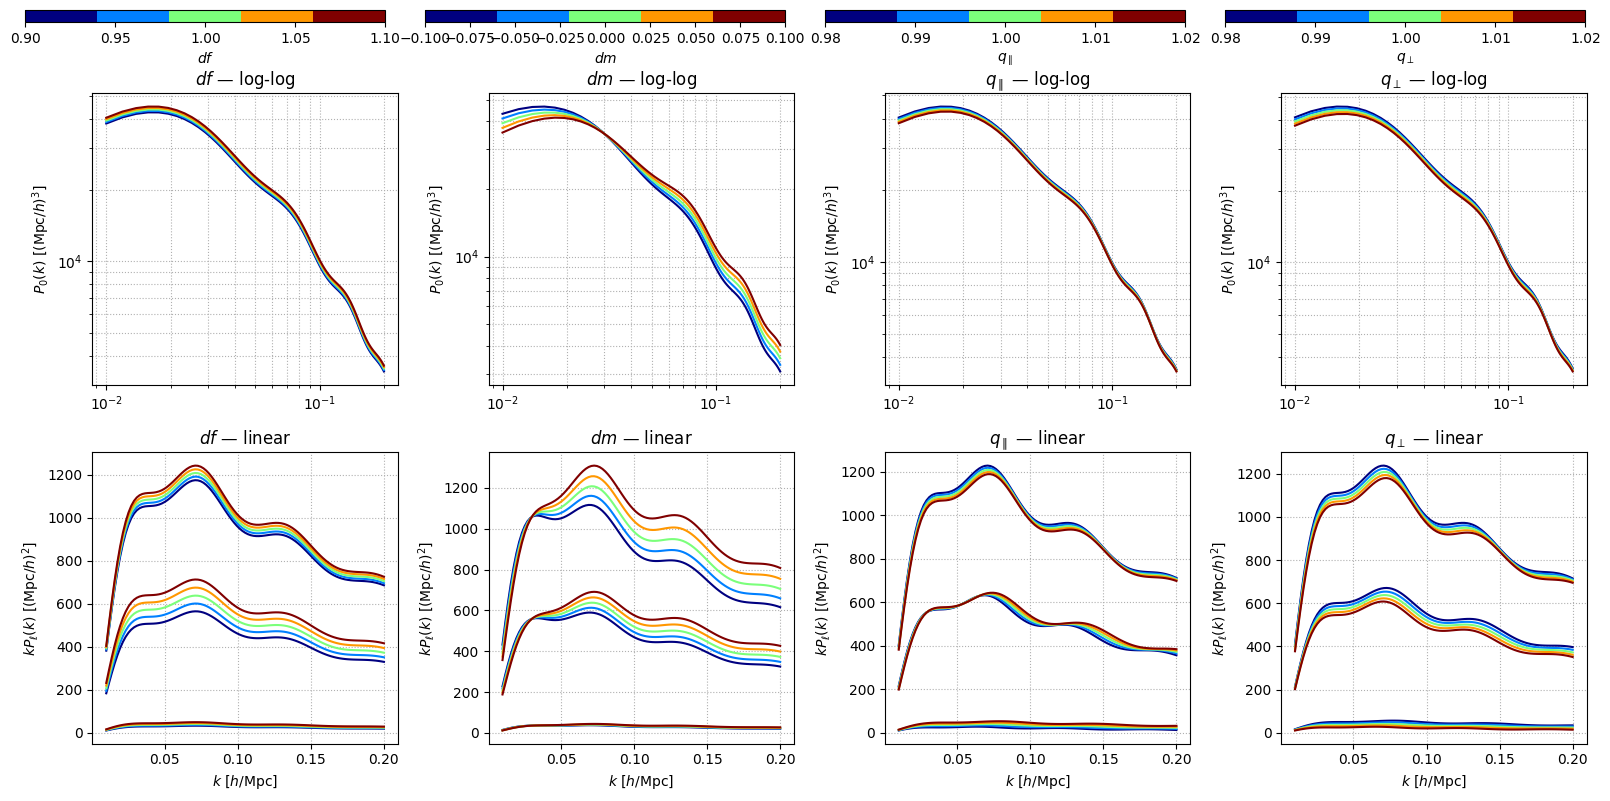

In [ ]:
#Evaluamos la función plot() utilizando ShapeFit y variando sus parámetros.
plot(ShapeFitPowerSpectrumTemplate(), 'shapefit',\
{'df': np.linspace(0.9, 1.1, n), 'dm': np.linspace(-0.1, 0.1, n), 'qpar': np.linspace(0.98, 1.02, n), 'qper': np.linspace(0.98, 1.02, n)})

El parametro de Shape $m$ codifica la **información de la pendiente!**

### **Parametrización directa (Full-modeling)**

En términos de parámetros cosmológicos base

In [ ]:
from desilike.theories.galaxy_clustering import\
DirectPowerSpectrumTemplate ## Full-modeling <----

template = DirectPowerSpectrumTemplate(z=1.1)
# This shows all parameters, after initialization of the calculator
print(template.all_params)

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k'])


{'h': 0.6736, 'omega_cdm': 0.12, 'omega_b': 0.02237, 'logA': 3.0363942552728806, 'b1': 2.0, 'sn0': 0.0}


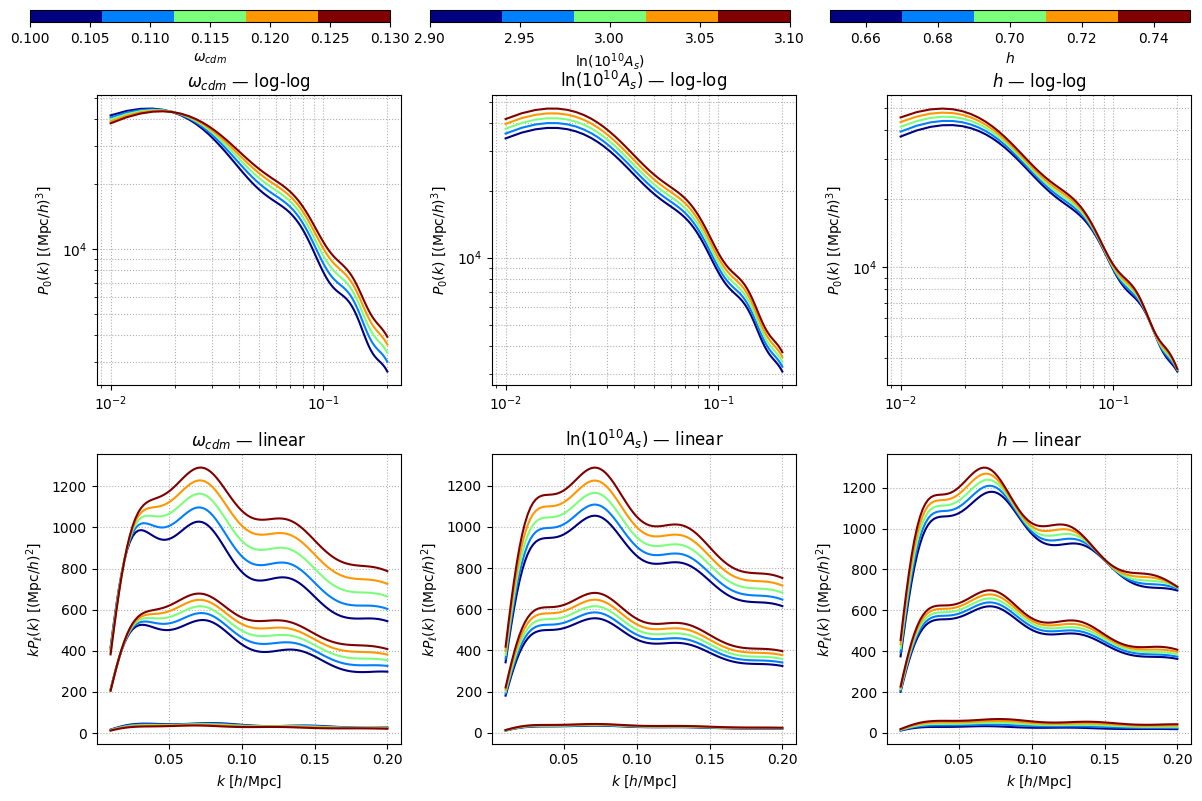

In [ ]:
#Evaluamos la función plot() utilizando DirectPowerspectrum() y variando algunos de sus parámetros.
plot(DirectPowerSpectrumTemplate(),
'direct', {'omega_cdm': np.linspace(0.1, 0.13, n), 'logA': np.linspace(2.9, 3.1, n), 'h': np.linspace(0.65, 0.75, n)})

In [ ]:
#Poner priors a los parámetros

from desilike.theories import Cosmoprimo

cosmo = Cosmoprimo(fiducial='DESI')
# Default parameters are specified in .yaml file, but can be updated:
print(cosmo.init.params)
# Changes to cosmo.init.params impact any calculator (pipeline) that depends on cosmo
# Changes to cosmo.all_params impact this calculator (pipeline) only

del cosmo.init.params['omega_cdm']
cosmo.init.params['Omega_m'] = {
        'prior': {'limits': [0.01, 0.99]},
        'ref': {'dist': 'norm', 'loc': 0.32, 'scale': 0.01},
        'latex': r'\Omega_{m}'}
for name in ['n_s', 'tau_reio']:
    cosmo.init.params[name].update(fixed=True)
template = DirectPowerSpectrumTemplate(cosmo=cosmo, z=1.1)
print(template.all_params['Omega_m'].ref.loc)

ParameterCollection(['h', 'theta_MC_100', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'm_ncdm', 'N_eff', 'w0_fld', 'wa_fld', 'Omega_k'])
0.32


### **¡busca ayuda!**

In [ ]:
help(ShapeFitPowerSpectrumTemplate)

Help on class ShapeFitPowerSpectrumTemplate in module desilike.theories.galaxy_clustering.power_template:

class ShapeFitPowerSpectrumTemplate(BasePowerSpectrumTemplate)
 |  ShapeFitPowerSpectrumTemplate(*args, **kwargs)
 |  
 |  ShapeFit power spectrum template.
 |  
 |  Parameters
 |  ----------
 |  k : array, default=None
 |      Theory wavenumbers where to evaluate the linear power spectrum.
 |  
 |  z : float, default=1.
 |      Effective redshift.
 |  
 |  kp : float, default=0.03
 |      Pivot point in ShapeFit parameterization.
 |  
 |  a : float, default=0.6
 |      :math:`a` parameter in ShapeFit parameterization.
 |  
 |  apmode : str, default='qparqper'
 |      Alcock-Paczynski parameterization:
 |  
 |      - 'qiso': single istropic parameter 'qiso'
 |      - 'qap': single, Alcock-Paczynski parameter 'qap'
 |      - 'qisoqap': two parameters 'qiso', 'qap'
 |      - 'qparqper': two parameters 'qpar' (scaling along the line-of-sight), 'qper' (scaling perpendicular to the lin

## **Theory**

Actualmente disponibles (para la mayoría de ellos, existe la contraparte para la función de correlación:  
...PowerSpectrumMultipoles  
...CorrelationFunctionMultipoles):

- **Modelo Kaiser simple: KaiserTracerPowerSpectrumMultipoles**
- Velocileptors: LPTVelocileptorsTracerPowerSpectrumMultipoles (y otras variantes)
- PyBird: PyBirdTracerPowerSpectrumMultipoles
- **FOLPS: FOLPSTracerPowerSpectrumMultipoles**
- TNS a 1 loop: TNSTracerPowerSpectrumMultipoles
- BAO empíricos: DampedBAOWigglesPowerSpectrumMultipoles
- PNG (sesgo dependiente de escala): PNGTracerPowerSpectrumMultipoles

- ¡el tuyo!

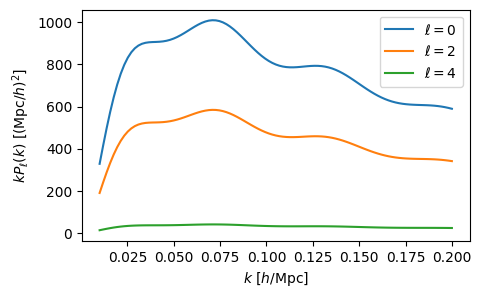

In [ ]:
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles, FOLPSAXTracerPowerSpectrumMultipoles

theory = KaiserTracerPowerSpectrumMultipoles(template=template)
# This is how any calculator (template, theory, etc.) can be called
power = theory(b1=1.8)
fig, ax = plt.subplots(1, 1, sharex=False, sharey=True, figsize=(5, 3), squeeze=True)
for ill, ell in enumerate(theory.ells):
    ax.plot(theory.k, theory.k * theory.power[ill], label=r'$\ell = {:d}$'.format(ell))
ax.legend()
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
ax.set_ylabel(r'$k P_{\ell}(k)$ [$(\mathrm{Mpc}/h)^{2}$]');

Para la función de correlación, reemplaza `"PowerSpectrumMultipoles"` por `"CorrelationFunctionMultipoles"`.

ParameterCollection(['h', 'omega_b', 'logA', 'Omega_m', 'b1'])


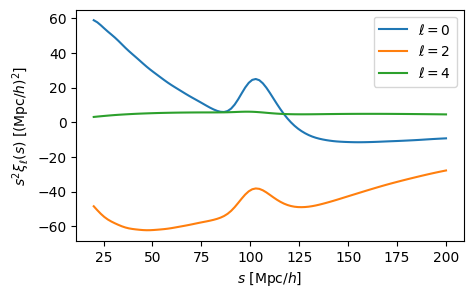

In [ ]:
from desilike.theories.galaxy_clustering import KaiserTracerCorrelationFunctionMultipoles, FOLPSTracerCorrelationFunctionMultipoles, FOLPSAXTracerCorrelationFunctionMultipoles
theory = KaiserTracerCorrelationFunctionMultipoles(template=template)
# This is how to get all varied parameters
print(theory.varied_params)
corr = theory(b1=1.8, h=0.69)
fig, ax = plt.subplots(1, 1, sharex=False, sharey=True, figsize=(5, 3), squeeze=True)
for ill, ell in enumerate(theory.ells):
    ax.plot(theory.s, theory.s**2 * corr[ill], label=r'$\ell = {:d}$'.format(ell))
ax.legend()
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$s^{2} \xi_{\ell}(s)$ [$(\mathrm{Mpc}/h)^{2}$]');

## **¡instala cualquier calculadora! (y muestreador y perfilador)**

In [ ]:
from desilike import setup_logging

setup_logging()  # set logging

from desilike import Installer

theory = KaiserTracerCorrelationFunctionMultipoles(template=template)
#theory = FOLPSAXTracerCorrelationFunctionMultipoles(template=template)
installer = Installer(user=True)
installer(theory)

[000000.12] [0/1] 06-21 23:45  Installer                 INFO     Installation directory is /root/.local.


## **Observable**

Luego, queremos comparar la teoría con los datos (un observable), típicamente:

- multipolos del espectro de potencias, con `TracerPowerSpectrumMultipolesObservable`  
- multipolos de la función de correlación, con `TracerCorrelationFunctionMultipolesObservable`


In [ ]:
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable, TracerCorrelationFunctionMultipolesObservable

template = ShapeFitPowerSpectrumTemplate(z=1.1)                      #se define el template
b1 = 1.5                                                             #bias
theory = KaiserTracerPowerSpectrumMultipoles(template=template)      #teoria: Kaiser

#Se crean "fake/synthetic" datos usando la teoria (evaluada en b1=b1)
observable = TracerPowerSpectrumMultipolesObservable(\
             data={'b1': b1},  # a (list of) (path to) PowerSpectrumStatistics object, flat array, or dictionary of parameters
             covariance=None,  # a (list of) (path to) mocks, array (covariance matrix), or None
             klim={0: [0.01, 0.2, 0.005], 2: [0.01, 0.2, 0.005]},  # k-limits, between 0.01 and 0.2 h/Mpc with 0.005 h/Mpc
             theory=theory)  # previously defined theory
# Look at help(TracerPowerSpectrumMultipolesObservable)
# for more options (to provide ells, k instead of klim, shotnoise...)
# also, https://github.com/cosmodesi/desilike/blob/main/nb/bao_examples.ipynb

**Nota:** aún no tenemos una matriz de covarianza, así que vamos a calcularla (gaussiana y sin la aproximación de ventana)



In [ ]:
from desilike.observables.galaxy_clustering import BoxFootprint, ObservablesCovarianceMatrix

footprint = BoxFootprint(volume=5e9, nbar=1e-4)  # box with volume of 5 (Gpc/h)^3 and density of 1e-4 (h/Mpc)^3
covariance = ObservablesCovarianceMatrix(observables=[observable], footprints=[footprint])
cov = covariance(b1=b1)   # evaluate covariance matrix at this parameter

### **Likelihood (Verosimilitud)**

In [ ]:
from desilike.likelihoods import ObservablesGaussianLikelihood

# No need to specify covariance if already given to the observable (TracerPowerSpectrumMultipolesObservable)
# If mocks are given to each observable, the likelihood covariance matrix is computed on-the-fly,
# using mocks from each observable (taking into account correlations)
likelihood = ObservablesGaussianLikelihood(observables=observable, covariance=cov)
print('likelihood(b1=1.50) ', likelihood(b1=1.50))  # actually logposterior = likelihood.loglikelihood + likelihood.logprior
print('likelihood(b1=1.51) =',likelihood(b1=1.51))  # actually logposterior = likelihood.loglikelihood + likelihood.logpriorlikelihood = ObservablesGaus=sianLikelihood(observables=observable, covariance=cov)
likelihood(b1=1.53)

likelihood(b1=1.50)  0.0
likelihood(b1=1.51) = -1.6960719879757553


-15.436233686203073

In [ ]:
#matriz de covarianza
#observable.covariance

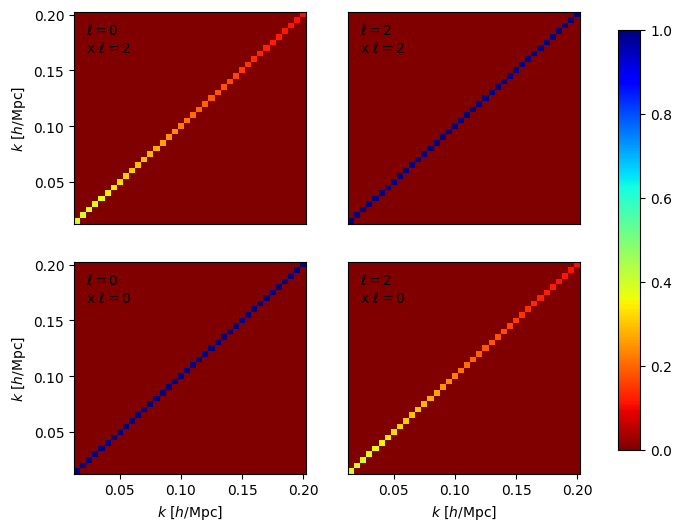

In [ ]:
#plot de matriz de covarianza
observable.plot_covariance_matrix();

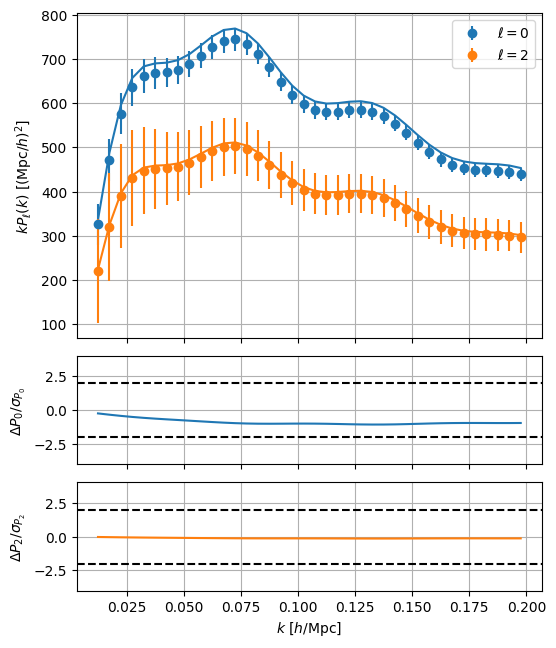

In [ ]:
#plot de best-fit
observable.plot();

La verosimilitud (y cualquier otra calculadora) puede ser llamada en cualquier momento con

In [ ]:
#Evalua la likelihood y el modelo para diferentes valores!

print('likelihood(b1=1., sn0=1000.) = ', likelihood(b1=1., sn0=1000.))  # update linear bias b1, and shot noise sn0
#print('likelihood(qpar=0.94) = ', likelihood(qpar=0.94))  # update scaling parameter qpar; b1 and sn0 are kept to 1. and 1000.
print('likelihood(sn0=100.) =', likelihood(sn0=100.))  # update shot noise, the template is to re-calculated

theory.power  # contains multipoles of the power spectrum, evaluated at b1=1., qpar=0.99 and sn0=100.
theory(sn0=1000.);  # recomputes the theory at sn0=1000.

likelihood(b1=1., sn0=1000.) =  -92600376261.15274
likelihood(sn0=100.) = -923333842.6197486


La verosimilitud (o cualquier calculadora) puede ser reparametrizada siguiendo, por ejemplo:

In [ ]:
likelihood.all_params['qpar'].update(derived='{qiso} * {qap}**(2. / 3.)')
likelihood.all_params['qper'].update(derived='{qiso} * {qap}**(- 1. / 3.)')
# Then add qiso, qap to the parameter collection
likelihood.all_params['qiso'] = {'prior': {'limits': [0.9, 1.1]}, 'latex': 'q_{\mathrm{iso}}'}
likelihood.all_params['qap'] = {'prior': {'limits': [0.9, 1.1]}, 'latex': 'q_{\mathrm{ap}}'}
# Now the likelihood has for varied parameters
likelihood.varied_params  # b1, sn0, df, dm, qiso, qap

ParameterCollection(['dm', 'df', 'b1', 'sn0', 'qiso', 'qap'])

Se puede actualizar cualquier calculadora con `calculator.init.update`

In [ ]:
template = DirectPowerSpectrumTemplate(z=1.1)
theory.init.update(template=template)  # this impacts any calculator that depends on theory
likelihood.varied_params

ParameterCollection(['h', 'omega_cdm', 'omega_b', 'logA', 'b1', 'sn0'])

## **Enlaces (Bindings)**

Ahora que ya tenemos nuestra función de verosimilitud (*likelihood*), podemos enlazarla con códigos externos de inferencia cosmológica como **Cobaya**, **CosmoSIS** y **MontePython**.


In [ ]:
from desilike import utils
!rm -rf _tests
utils.mkdir('_tests')

In [ ]:
%%file _tests/kaiser_likelihood.py

#Función para la likelihood
def MyLikelihood():

    from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, KaiserTracerPowerSpectrumMultipoles
    from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable, BoxFootprint, ObservablesCovarianceMatrix
    from desilike.likelihoods import ObservablesGaussianLikelihood

    # 'external' means "get primordial quantities from external source, e.g. cobaya
    #Definimos: template, teoría y observable
    template = DirectPowerSpectrumTemplate(z=1.1, cosmo='external')
    theory = KaiserTracerPowerSpectrumMultipoles(template=template)
    observable = TracerPowerSpectrumMultipolesObservable(data={'b1': 1.2}, covariance=None,
                                                         klim={0: [0.01, 0.2, 0.005], 2: [0.01, 0.2, 0.005]}, theory=theory)
    #covarianza
    footprint = BoxFootprint(volume=1e9, nbar=1e-3)
    covariance = ObservablesCovarianceMatrix(observables=observable, footprints=footprint)
    cov = covariance(b1=1.2)
    return ObservablesGaussianLikelihood(observables=observable, covariance=cov)

if __name__ == '__main__':
    from desilike.bindings import CobayaLikelihoodGenerator, CosmoSISLikelihoodGenerator, MontePythonLikelihoodGenerator

#Pasamos la función de likelihood a los samplers
    CobayaLikelihoodGenerator()(MyLikelihood)
    CosmoSISLikelihoodGenerator()(MyLikelihood)
    MontePythonLikelihoodGenerator()(MyLikelihood)

Writing _tests/kaiser_likelihood.py


Vamos a pasar esta función a los generadores que escribirán los archivos necesarios
para importarla como una verosimilitud externa en **Cobaya**, **CosmoSIS** y **MontePython**.

## **Emulators**

Los modelos de teoría EFT típicamente tardan ~1 segundo en ejecutarse.  
Proveemos herramientas para su emulación:

- Expansión de Taylor, hasta un cierto orden, con `TaylorEmulatorEngine`  
- Red neuronal con `MLPEmulatorEngine`


In [ ]:
template = DirectPowerSpectrumTemplate(z=1.1)                    #definir template
template.init.params['omega_b'].update(fixed=True)
theory = KaiserTracerPowerSpectrumMultipoles(template=template)  #teoría

#observable: multipolos 0:monopolo, 2:cuadrupolo; 0.01 < k/[h/Mpc] < 0.20; dk=0.005
observable = TracerPowerSpectrumMultipolesObservable(data={'b1': 1.8}, covariance=None,
                                                     klim={0: [0.01, 0.2, 0.005], 2: [0.01, 0.2, 0.005]}, theory=theory)
#covarianza y likelihood
footprint = BoxFootprint(volume=1e9, nbar=1e-3)
covariance = ObservablesCovarianceMatrix(observables=observable, footprints=footprint)
likelihood = ObservablesGaussianLikelihood(observables=observable, covariance=covariance(b1=1.8))

Vamos a emular la parte de teoría de perturbaciones (.pt) realizando una expansión de Taylor de orden 2.

In [ ]:
from desilike.emulators import Emulator, TaylorEmulatorEngine, EmulatedCalculator

#Define el emulador: Introduce teoría, y Taylor order
emulator = Emulator(theory.pt,
                    engine=TaylorEmulatorEngine(order={'*': 2})) #, 'sn0': 1
emulator.set_samples()
emulator.fit()  # set Taylor expansion

# Emulator can be saved with:
emulator.save('_tests/emulator.npy')
# And reloaded with:
pt = EmulatedCalculator.load('_tests/emulator.npy')

theory.init.update(pt=pt)

[000118.21] [0/1] 06-21 23:47  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'logA'].
[000118.21] [0/1] 06-21 23:47  Emulator                  INFO     Found varying ['pk_dd', 'pk_dt', 'pk_tt', 'pk11'] and fixed ['k', 'z', 'ells', 'names'] outputs.
[000121.70] [0/1] 06-21 23:47  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'logA'].
[000137.66] [0/1] 06-21 23:48  Differentiation           INFO     Using finite-differentiation for parameter h.
[000137.66] [0/1] 06-21 23:48  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000137.66] [0/1] 06-21 23:48  Differentiation           INFO     Using finite-differentiation for parameter logA.
[000137.66] [0/1] 06-21 23:48  Differentiation           INFO     h grid is [0.6436 0.6736 0.7036].
[000137.67] [0/1] 06-21 23:48  Differentiation           INFO     omega_cdm grid is [0.11 0.12 0.13].
[000137.67] [0/1] 06-21 23:48  Differentiation           INFO 

In [ ]:
# ahora la teoría se calcula más rapido! (ya esta emulada)
print('P0, P2 = ', theory(logA=3.));

P0, P2 =  [[25136.33439934 26043.65082398 24720.12582377 22313.05498824
  19635.19020397 17186.27149712 15199.6710743  13713.47165311
  12647.50100004 11865.72204316 11221.96805615 10593.94842052
   9906.3666655   9139.6210945   8322.15887055  7510.24854366
   6763.98696795  6128.32562889  5623.88409429  5246.68383213
   4973.75882628  4770.7305673   4599.83298475  4427.67650928
   4231.71627456  4003.93861962  3750.27979128  3486.30532514
   3231.01988765  3001.16452797  2807.4724396   2653.23735617
   2534.90796516  2443.90492673  2369.0944614   2299.99972501
   2226.72335161  2143.53427451]
 [16990.08844956 17603.35950454 16708.765788   15081.78447302
  13271.76878752 11616.5017635  10273.72376078  9269.1755549
   8548.6673298   8020.24924719  7585.12465799  7160.63519239
   6695.88664765  6177.62989386  5625.09286649  5076.30846349
   4571.89720059  4142.24257375  3801.2817098   3546.32544936
   3361.85066008  3224.62030565  3109.10763791  2992.74406244
   2860.29110942  2706.33220

## **Profilers, samplers**

Como podríamos querer probar la inferencia cosmológica directamente  
(sin recurrir a montepython, cosmosis o cobaya),  
proporcionamos envolturas para algunos perfiladores y muestreadores.

Los perfiladores actualmente disponibles son:
- [minuit](https://github.com/scikit-hep/iminuit), utilizado por la comunidad de física de altas energías, con `MinuitProfiler`  
- [bobyqa](https://github.com/numericalalgorithmsgroup/pybobyqa), con `BOBYQAProfiler`  
- [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize), con `ScipyProfiler`


In [ ]:
!pip install iminuit
#installer = Installer(user=True)
#installer(MinuitProfiler)

In [ ]:
#Usaremos Imminuit
from desilike.profilers import MinuitProfiler

profiler = MinuitProfiler(likelihood)                                        #define el profiler
profiles = profiler.maximize(niterations=5)                                  #Number of iterations, i.e. of runs of the profiler from independent starting points.
profiles = profiler.interval(params=['h', 'omega_cdm', 'logA', 'b1'], cl=2)  #params & intervalo
# To assess best fit parameters (among all iterations)
profiles.bestfit.choice()
# To print relevant information
print(profiles.to_stats(tablefmt='pretty'))

[000220.01] [0/1] 06-21 23:49  MinuitProfiler            INFO     Varied parameters: ['h', 'omega_cdm', 'logA', 'b1', 'sn0'].
[000220.13] [0/1] 06-21 23:49  MinuitProfiler            INFO     Could *not* jit input likelihood.
[000220.14] [0/1] 06-21 23:49  MinuitProfiler            INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
[000244.67] [0/1] 06-21 23:49  MinuitProfiler            INFO     Could *not* jit input likelihood.
[000244.67] [0/1] 06-21 23:49  MinuitProfiler            INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
+------------------------------------+--------+---------+--------+---------------+
| chi2 / (76 - 5) = 0.00 / 71 = 0.00 | varied | bestfit | error  |   interval    |
+------------------------------------+--------+---------+--------+---------------+
|                 h                  |  True  |  0.674  | 0.015  | -0

## **MCMC**

Samplers disponibles:

- [Hamiltonian Monte Carlo Sampler](https://github.com/blackjax-devs/blackjax), with `HMCSampler`
- [No U-Turn Sampler](https://github.com/blackjax-devs/blackjax), with `NUTSSampler`
- [Antony Lewis MCMC Sampler](https://github.com/CobayaSampler/cobaya/tree/master/cobaya/samplers/mcmc>) with `MCMCSampler`
- [emcee ensemble sampler](https://github.com/dfm/emcee), with `EmceeSampler`
- [zeus ensemble slicing sampler](https://github.com/minaskar/zeus), with `ZeusSampler`
- [pocomc pre-conditioned Monte-Carlo sampler](https://github.com/minaskar/pocomc), with `PocoMCSampler`
- [dynesty nested sampler](https://github.com/joshspeagle/dynesty), with `DynamicDynestySampler`
- [polychord nested sampler](https://github.com/PolyChord/PolyChordLite), with `NestedSampler`

In [ ]:
#usemos emcee
import sys
!{sys.executable} -m pip install emcee

In [ ]:
from desilike.samplers import EmceeSampler
from desilike.samples import Chain
import emcee

sampler = EmceeSampler(likelihood, seed=42, chains=1)  # Se inicializa el sampler
chains = sampler.run(check={'max_eigen_gr': 0.07})     # Gelman-Rubin criterio < 0.07
chain = Chain.concatenate([chain.remove_burnin(0.5) for chain in chains])[::5]  # remueve burnin y adelgaza (opcional)

[000264.40] [0/1] 06-21 23:50  EmceeSampler              INFO     Varied parameters: ['h', 'omega_cdm', 'logA', 'b1', 'sn0'].
[000264.42] [0/1] 06-21 23:50  EmceeSampler              INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
[000264.44] [0/1] 06-21 23:50  EmceeSampler              INFO     Could *not* jit input likelihood.
[000334.15] [0/1] 06-21 23:51  EmceeSampler              INFO     Diagnostics:
[000334.18] [0/1] 06-21 23:51  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 1.96; not < 0.07.
[000334.21] [0/1] 06-21 23:51  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.216.
[000334.40] [0/1] 06-21 23:51  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.574.
[000334.42] [0/1] 06-21 23:51  Diagnostics               INFO     - max Geweke is 0.592.
[000334.42] [0/1] 06-21 23:51  Diagnostics               INFO     - Geweke p-value is 0.33

In [ ]:
# To print relevant information
print(chain.to_stats(tablefmt='pretty'))

+-----------+--------+--------+--------+--------+-----------------+-----------------+
|           | argmax |  mean  | median |  std   | quantile:1sigma | interval:1sigma |
+-----------+--------+--------+--------+--------+-----------------+-----------------+
|     h     | 0.668  | 0.675  | 0.675  | 0.015  |  -0.014/+0.015  |  -0.015/+0.013  |
| omega_cdm | 0.1197 | 0.1210 | 0.1208 | 0.0059 | -0.0059/+0.0059 | -0.0068/+0.0049 |
|   logA    | 3.046  | 3.025  | 3.025  | 0.089  |  -0.090/+0.089  |  -0.091/+0.088  |
|    b1     | 1.797  | 1.805  | 1.804  | 0.058  |  -0.059/+0.058  |  -0.059/+0.058  |
|    sn0    | 0.000  | -0.001 | -0.001 | 0.010  | -0.0100/+0.0100 | -0.0101/+0.0099 |
+-----------+--------+--------+--------+--------+-----------------+-----------------+


In [ ]:
import sys
!{sys.executable} -m pip install getdist

Removed no burn in


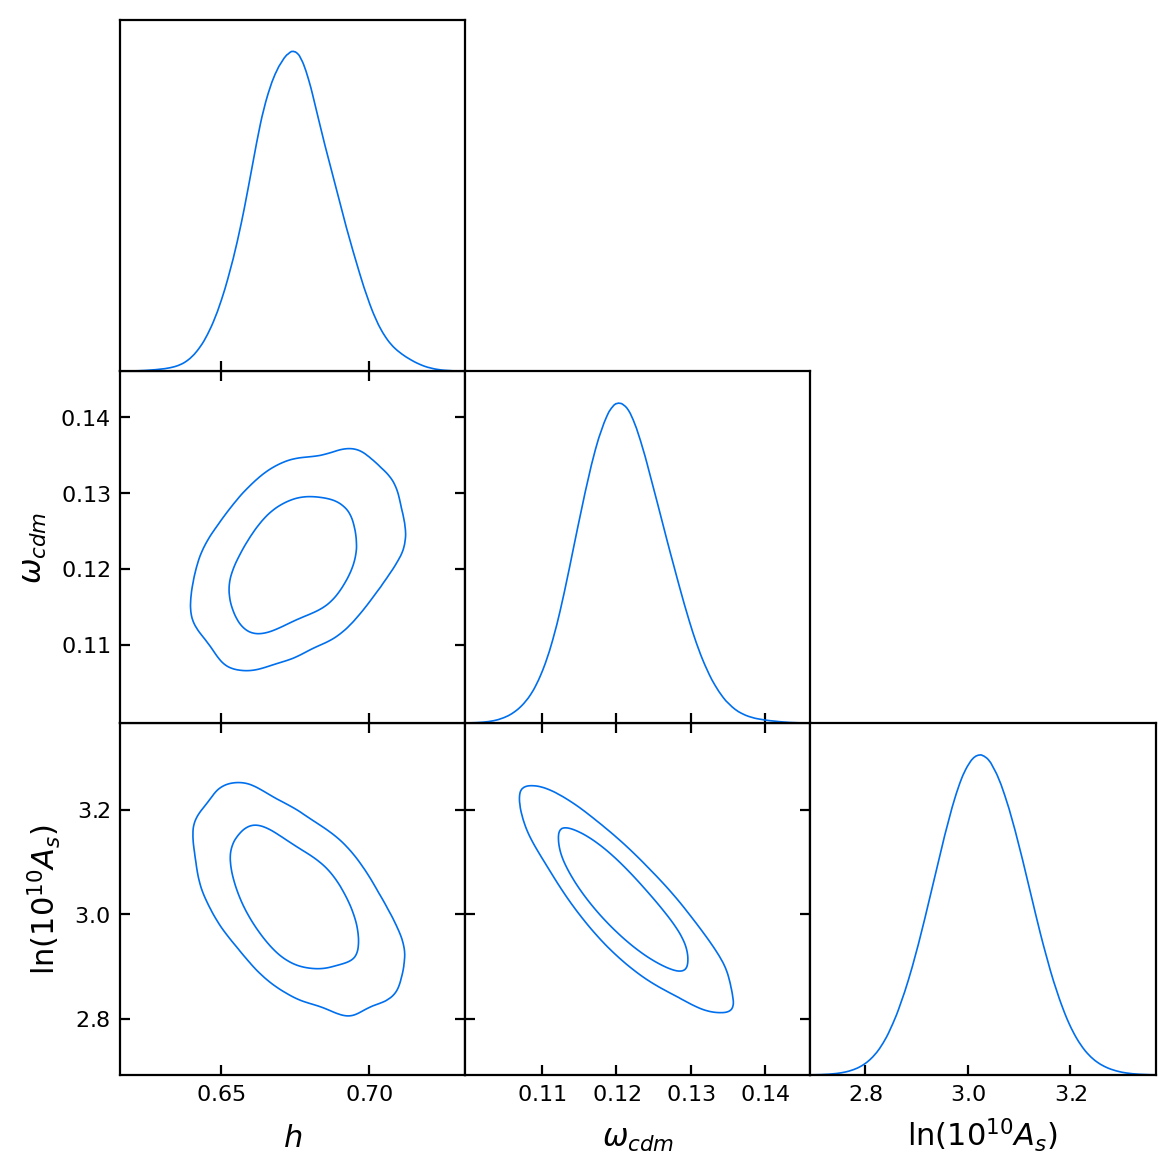

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from desilike.samples import plotting
plotting.plot_triangle(chain, params=['h', 'omega_cdm', 'logA'])

## **Profile**

In [ ]:
profiler = MinuitProfiler(likelihood)  # optinally, provide save_fn = 'profiles.npy' to save profiles to save_fn
profiles = profiler.maximize(niterations=5)
#profiles = profiler.interval(params=['b1'])
# To print relevant information
#if profiler.mpicomm.rank == 0:
#  print(profiles.to_stats(tablefmt='pretty'))
#  # If you saved profiles to 'profiles.npy', you can load the object with:
#  # from desilike.samples import Profiles
#  # profiles = Profiles.load('profiles.npy')

[001289.84] [0/1] 06-22 00:07  MinuitProfiler            INFO     Varied parameters: ['h', 'omega_cdm', 'logA', 'b1', 'sn0'].
[001290.02] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* jit input likelihood.
[001290.02] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.


In [ ]:
# Quantities can be accessed through:
print(profiles.bestfit['b1'])

# Save/load example
import os
import tempfile
with tempfile.TemporaryDirectory() as tmp_dir:
    fn = os.path.join(tmp_dir, 'tmp.npy')
    profiles.save(fn)
    from desilike.samples import Profiles
    profiles = Profiles.load(fn)

print(profiles.to_stats(tablefmt='pretty'))

ParameterArray(b1, None, [1.80010017 1.79996404 1.80000507 1.79993503 1.7998634 ])
[001313.33] [0/1] 06-22 00:07  Profiles                  INFO     Saving /tmp/tmpfmwvl4e4/tmp.npy.
[001313.33] [0/1] 06-22 00:07  Profiles                  INFO     Loading /tmp/tmpfmwvl4e4/tmp.npy.
+------------------------------------+--------+---------+--------+
| chi2 / (76 - 5) = 0.00 / 71 = 0.00 | varied | bestfit | error  |
+------------------------------------+--------+---------+--------+
|                 h                  |  True  |  0.674  | 0.015  |
|             omega_cdm              |  True  | 0.1200  | 0.0057 |
|                logA                |  True  |  3.036  | 0.087  |
|                 b1                 |  True  |  1.800  | 0.057  |
|                sn0                 |  True  | 0.0000  | 0.0099 |
+------------------------------------+--------+---------+--------+


In [ ]:
# Compute \Delta \chi^{2} = cl^2 = 1 interval for the best best of above best fits
profiles = profiler.interval(cl=1)
# Interval can be accessed through
profiles.interval['b1']
print(profiles.to_stats(tablefmt='latex_raw'))

[001313.44] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* jit input likelihood.
[001313.44] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
\begin{tabular}{lllll}
\hline
 $\chi^{2} / (76 - 5) = 0.00 / 71 = 0.00$   & varied   & bestfit   & error    & interval                 \\
\hline
 $h$                                        & True     & $0.674$   & $0.015$  & ${}_{-0.015}^{+0.016}$   \\
 $\omega_{cdm}$                             & True     & $0.1200$  & $0.0057$ & ${}_{-0.0055}^{+0.0059}$ \\
 $\ln(10^{10} A_{s})$                       & True     & $3.036$   & $0.087$  & ${}_{-0.087}^{+0.086}$   \\
 $b_{1}$                                    & True     & $1.800$   & $0.057$  & ${}_{-0.056}^{+0.058}$   \\
 $s_{n, 0}$                                 & True     & $0.0000$  & $0.0099$ & ${}_{-0.0101}^{+0.0098}$ \\
\hline
\end{tabular}


[001324.93] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* jit input likelihood.
[001324.94] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
[001325.02] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* jit input likelihood.
[001325.02] [0/1] 06-22 00:07  MinuitProfiler            INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
[001339.97] [0/1] 06-22 00:08  MinuitProfiler            INFO     Could *not* jit input likelihood.
[001339.97] [0/1] 06-22 00:08  MinuitProfiler            INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
[001357.53] [0/1] 06-22 00:08  MinuitProfiler            INFO     Could *not* jit input likelihood.
[001357.53] [0/1] 06-22 00:08  MinuitProfiler            INFO     

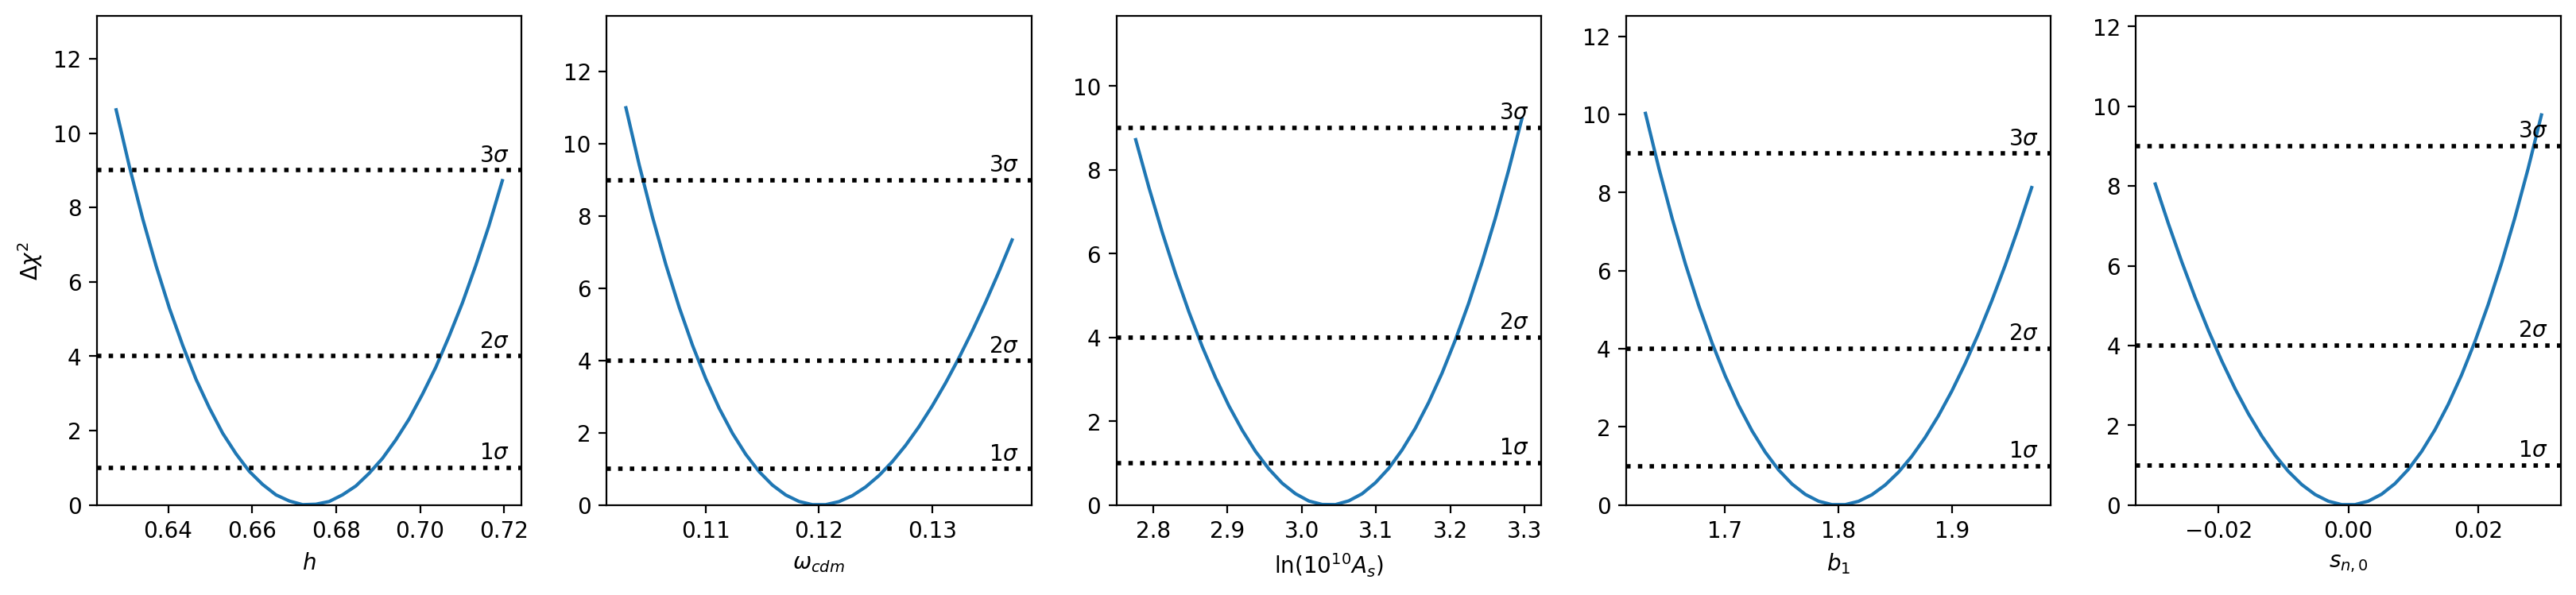

In [ ]:
# Profile posterior up to cl = 3 sigmas
profiles = profiler.profile(cl=3)
# And plot, subtracting \chi^{2} at best fit
plotting.plot_profile(profiles, offsets=profiles.bestfit.logposterior.max())

## **Compressed parameters**

##**MCMC shapefit**

In [ ]:
from desilike.theories.galaxy_clustering import ShapeFitPowerSpectrumTemplate, KaiserTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.parameter import Parameter, ParameterPrior
from desilike import setup_logging


template_SF = ShapeFitPowerSpectrumTemplate(z=z, fiducial='DESI')
template_SF.params['dm'].update(ref={'limits': [-0.001, 0.001]}, delta=0.001)
template_SF.params['df'].update(ref={'limits': [0.99, 1.01]}, delta=0.001)
for name in ['qpar', 'qper']: template_SF.params[name].update(ref={'limits': [0.998, 1.002]}, delta=0.001)
theory_SF = KaiserTracerPowerSpectrumMultipoles(template=template)
theory_SF.params['b1'].update(value=2.)

observable_SF = TracerPowerSpectrumMultipolesObservable(data={'b1': 1.8}, covariance=None,
                                                         klim={0: [0.01, 0.2, 0.005], 2: [0.01, 0.2, 0.005]}, theory=theory_SF)

#covarianza
footprint = BoxFootprint(volume=1e9, nbar=1e-3)
covariance = ObservablesCovarianceMatrix(observables=observable_SF, footprints=footprint)
cov_SF = covariance(b1=1.2)
likelihood_SF = ObservablesGaussianLikelihood(observables=observable_SF, covariance=cov_SF)



# NOTE: if we wanted to fit xi instead:
# theory = KaiserTracerCorrelationFunctionMultipoles(template=template)
# observable = TracerCorrelationFunctionObservable(data=data, mocks=mocks,
#                                                  slim={0: [40., 160], 2: [40., 160]}, # fit monopole and quadrupole, between 0.02 and 0.2 h/Mpc
#                                                  theory=theory)
# The rest would be the same

setup_logging()
likelihood_SF(b1=1.8)  # Initialize likelihood

0.0

In [ ]:
## set emulator
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine

emulator_SF = Emulator(theory_SF, engine=TaylorEmulatorEngine(order={'*': 2, 'sn0': 1}))  # order 2 except for sn0 (order 1 is enough)
emulator_SF.set_samples()
emulator_SF.fit()
#emulator.plot(name='power')

import os
base_dir = '_tests'
kaiser_emulator_fn = os.path.join(base_dir, 'kaiser_emulator.npy')
emulator.save(kaiser_emulator_fn)

[000000.09] [0/1] 06-22 00:10  Emulator                  INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1', 'sn0'].
[000000.09] [0/1] 06-22 00:10  Emulator                  INFO     Found varying ['f_sqrt_Ap', 'm', 'power'] and fixed ['n', 'k', 'z', 'ells', 'nd'] outputs.
[000000.10] [0/1] 06-22 00:10  Differentiation           INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1', 'sn0'].
[000000.12] [0/1] 06-22 00:10  Differentiation           INFO     Using finite-differentiation for parameter qpar.
[000000.12] [0/1] 06-22 00:10  Differentiation           INFO     Using finite-differentiation for parameter qper.
[000000.13] [0/1] 06-22 00:10  Differentiation           INFO     Using finite-differentiation for parameter dm.
[000000.13] [0/1] 06-22 00:10  Differentiation           INFO     Using finite-differentiation for parameter df.
[000000.14] [0/1] 06-22 00:10  Differentiation           INFO     Using finite-differentiation for parameter b1.
[000000.14] [0/1] 

In [ ]:
from desilike.samplers import EmceeSampler
from desilike.samples import Chain
import emcee

sampler_SF = EmceeSampler(likelihood_SF, seed=42, chains=1)  # Se inicializa el sampler
chains_SF = sampler_SF.run(check={'max_eigen_gr': 0.07})     # Gelman-Rubin criterio < 0.07
chain_SF = Chain.concatenate([chain.remove_burnin(0.5) for chain in chains_SF])[::5]  # remueve burnin y adelgaza (opcional)

[000994.28] [0/1] 06-22 00:42  EmceeSampler              INFO     Varied parameters: ['qpar', 'qper', 'dm', 'df', 'b1', 'sn0'].
[000994.30] [0/1] 06-22 00:42  EmceeSampler              INFO     Could *not* vmap input likelihood. Set logging level to debug (setup_logging("debug")) to get full stack trace.
[000994.32] [0/1] 06-22 00:42  EmceeSampler              INFO     Could *not* jit input likelihood.
[001012.92] [0/1] 06-22 00:43  EmceeSampler              INFO     Diagnostics:
[001012.95] [0/1] 06-22 00:43  Diagnostics               INFO     - max eigen Gelman-Rubin - 1 is 0.347; not < 0.07.
[001012.99] [0/1] 06-22 00:43  Diagnostics               INFO     - max diag Gelman-Rubin - 1 is 0.0827.
[001013.25] [0/1] 06-22 00:43  Diagnostics               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.179.
[001013.27] [0/1] 06-22 00:43  Diagnostics               INFO     - max Geweke is 0.232.
[001013.27] [0/1] 06-22 00:43  Diagnostics               INFO     - Geweke p-value is 

Removed no burn in
[001374.71] [0/1] 06-22 00:49  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[001374.72] [0/1] 06-22 00:49  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral


[001375.45] [0/1] 06-22 00:49  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[001375.45] [0/1] 06-22 00:49  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[001376.18] [0/1] 06-22 00:49  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral
[001376.18] [0/1] 06-22 00:49  matplotlib.mathtext       INFO     Substituting symbol \perp from STIXGeneral


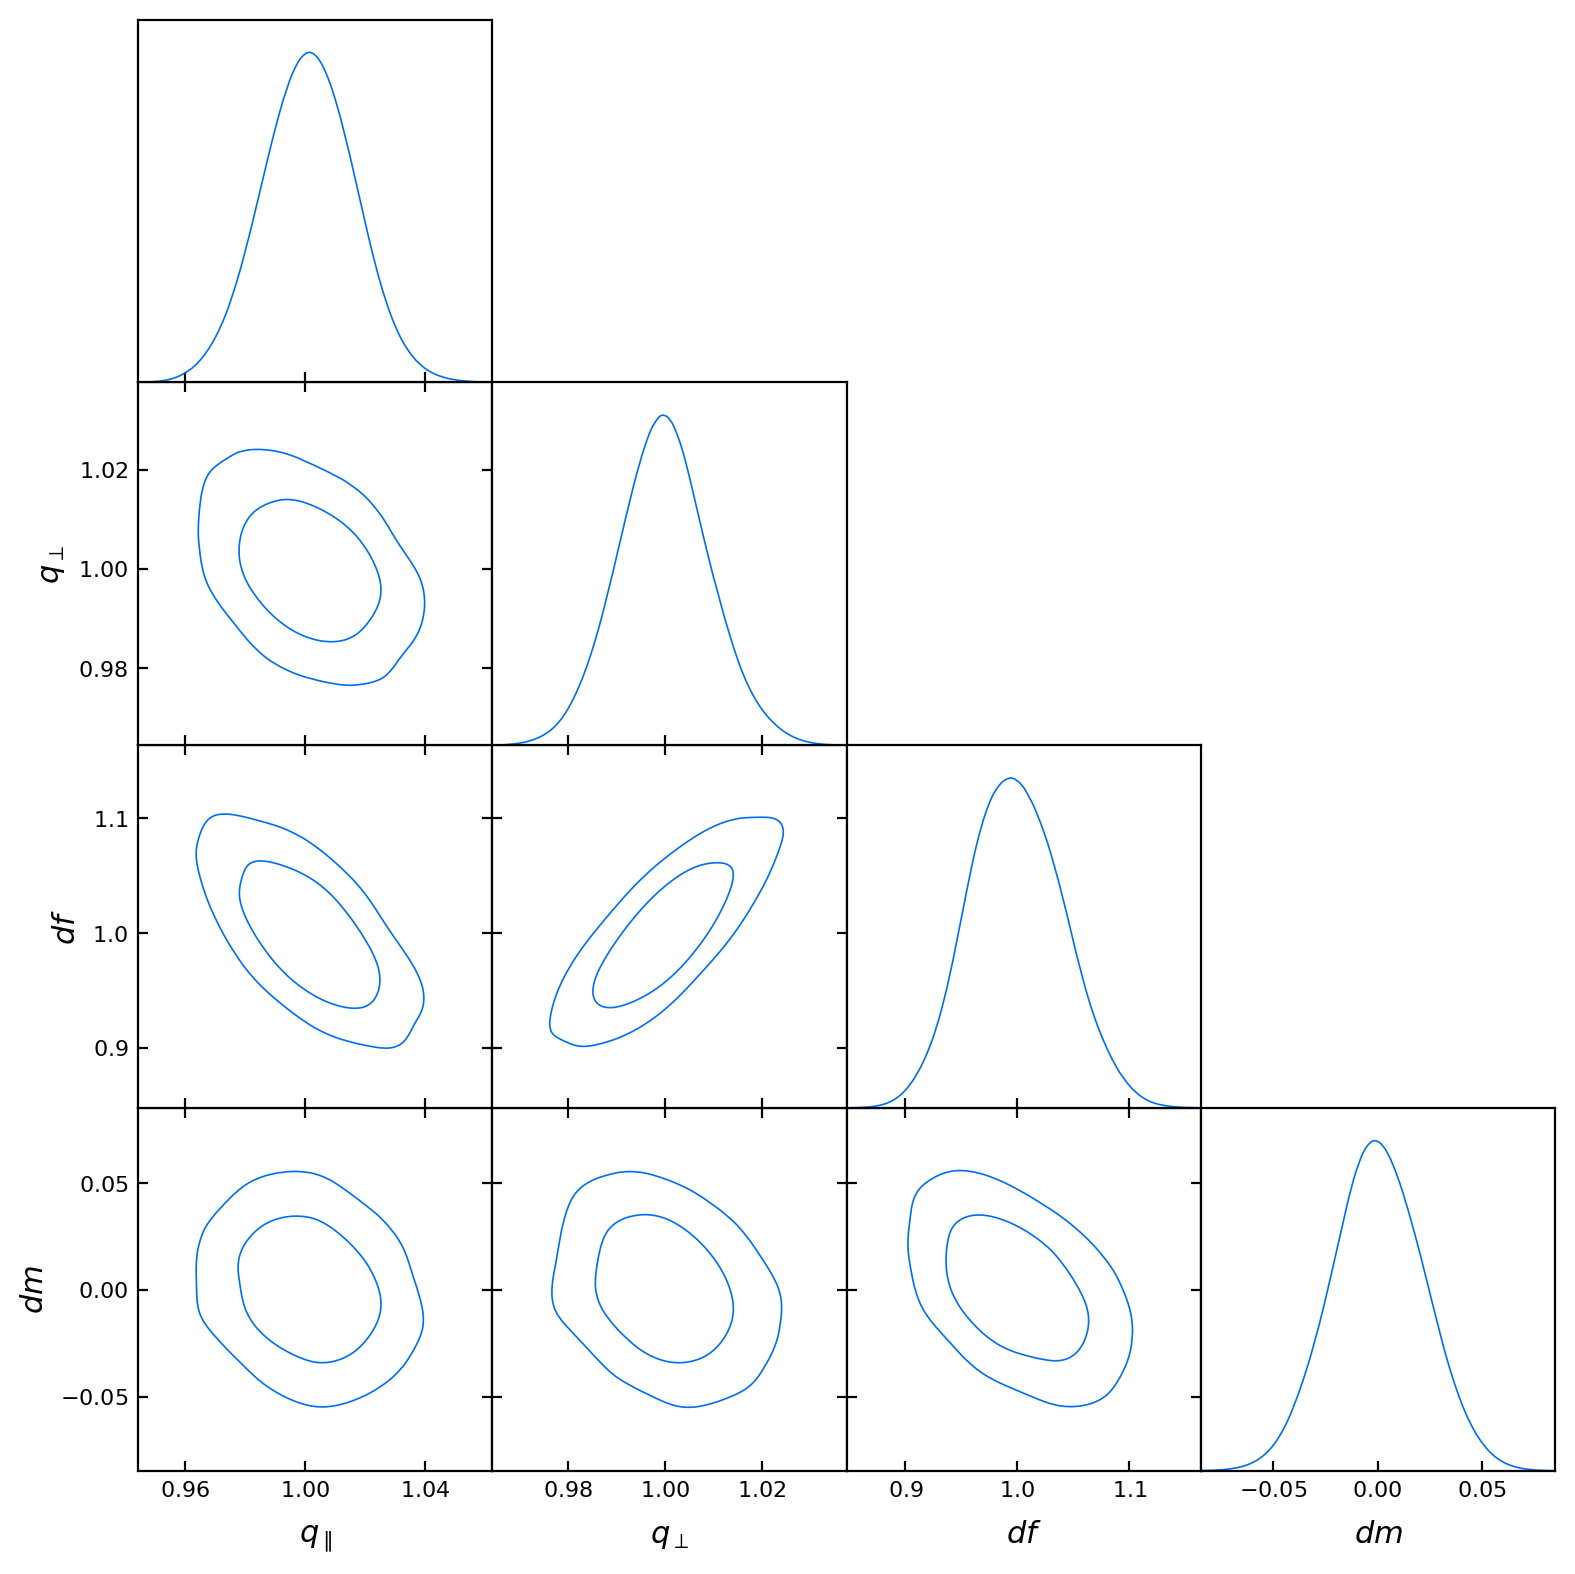

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from desilike.samples import plotting
plotting.plot_triangle(chain_SF, params=['qpar', 'qper', 'df', 'dm'])